# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

**ANSWER:** If a user buys 100 loot boxes, he will get 15 elixirs.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

**ANSWER:** There is no definite answer/chance that the user will get a elixir.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

**ANSWER:** X is a discrete random variable because it is countable.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

**ANSWER:**
Binomial distribution, because:
- number of loot box purchased is fixed at 100
- each loot box is independent of one another
- there is a constant probability of getting the elixir
- the outcome is binary

<BarContainer object of 101 artists>

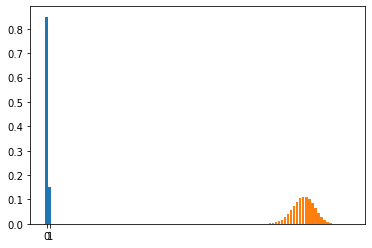

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Bernoulli pmf
elixir_outcomes = [0, 1]
elixir_probs = [0.85, 0.15]

plt.bar(elixir_outcomes, elixir_probs)
plt.xticks(elixir_outcomes);

#Binomial pmf
elixir = 0.85
n_box = 100

elixir_distn = stats.binom(n_box, elixir)

possible_elixir = list(range(0, 101))

plt.bar(possible_elixir,
        elixir_distn.pmf(possible_elixir))

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

Chances of getting more than 20 elixirs is 6.63%


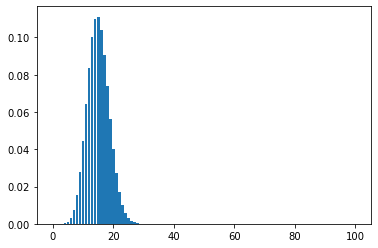

In [78]:
#Binomial pmf
elixir = 0.15
n_box = 100

elixir_distn = stats.binom(n_box, elixir)

possible_elixir = list(range(0, 101))

plt.bar(possible_elixir,
        elixir_distn.pmf(possible_elixir))

print(f"Chances of getting more than 20 elixirs is {round((1 - sum(elixir_distn.pmf(range(0,21))))*100,2)}%")

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

Chances of getting more than 20 elixirs is 6.63%


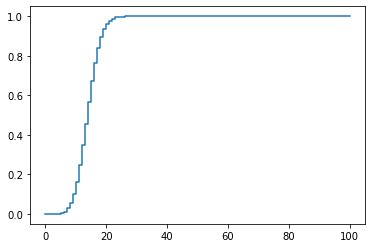

In [38]:
plt.step(possible_elixir,
         elixir_distn.cdf(possible_elixir))

print(f"Chances of getting more than 20 elixirs is {round((1 - elixir_distn.cdf(20))*100, 2)}%")

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [130]:
print(f"chances of getting more than 20 elixirs is , 100% - the accumulated chances of geting 1 to 20 elixirs. That is, {round((1 - elixir_distn.cdf(20))*100, 2)}%.")

chances of getting more than 20 elixirs is , 100% - the accumulated chances of geting 1 to 20 elixirs. That is, 6.63%.


#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Poisson distribution because:
-> the number of successes is a non-negative integer
-> each loot box is independent of one another
-> the rate at which events occur is constant,
->  two events cannot occur at exactly the same instant
-> the probability of an event occurring in an interval is proportional to the length of the interval.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [116]:
import math 
print(f" minimum no of users needed = {round(500000/2.7)}")

 minimum no of users needed = 185185


#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

Number of users who purchase 0 boxes: 1248.0
Revenue from users who purchase 0 boxes: $0.0
Number of users who purchase 1 boxes: 6239.0
Revenue from users who purchase 1 boxes: $6238.83
Number of users who purchase 2 boxes: 15597.0
Revenue from users who purchase 2 boxes: $31194.17
Number of users who purchase 3 boxes: 25995.0
Revenue from users who purchase 3 boxes: $77985.42
Number of users who purchase 4 boxes: 32494.0
Revenue from users who purchase 4 boxes: $129975.7
Number of users who purchase 5 or more boxes: 71118.0
Revenue from users who purchase 5 or more boxes: $385933.33


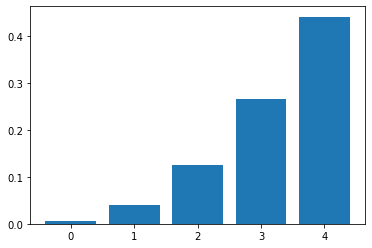

In [129]:
box_purchased = 5

box_distn = stats.poisson(box_purchased)

possible_box = list(range(0,5))
plt.bar(possible_box,
        box_distn.cdf(possible_box))

for i in range (0,5):
    print(f"Number of users who purchase {i} boxes: {round((box_distn.pmf(i))*185185,0)}")
    print(f"Revenue from users who purchase {i} boxes: ${round((box_distn.pmf(i))*185185*i,2)}")
print(f"Number of users who purchase 5 or more boxes: {round(185185-(box_distn.cdf(5))*185185,0)}")
print(f"Revenue from users who purchase 5 or more boxes: ${round(500000-(box_distn.cdf(5))*185185,2)}")

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

**ANSWER**:
- Total number of users = 185185
- Total revenue = 500,000
- Averge number of boxes purchased by each user = 2.7
- Average revenue per user = $2.70

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [118]:
box=[0,1]
box_stats = []

# We'll do k = 100,000 bootstrapped samples.
for i in range(100000):
    
    # Create a sample of size n = 100 *with replacement*.
    box_sample = np.random.choice(box, size = 100, replace = True)
    
    # Calculate the sample statistic.
    loot_box_stats = np.mean(box_sample)
    
    # Add the sample statistic to the list.
    box_stats.append(loot_box_stats)

In [119]:
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

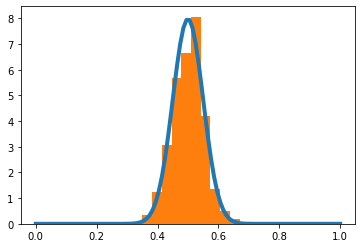

In [107]:
# Generate 200 equally-spaced values between 0 and 1.
p = np.linspace(0,1,100)

# Plot the Normal pdf with the mean and standard deviation of our population.
plt.plot(p,stats.norm.pdf(p, loc = np.mean(box), scale = np.std(box)/(100 ** 0.5)), lw = 4)

# Plot a histogram of our bootstrapped statistics.
plt.hist(box_stats, bins = 10, density = True);

In [99]:
# Pull the 5th percentile from our bootstrapped statistics.
np.percentile(box_stats, 5)

0.41

In [100]:
# Pull the 25th percentile from our bootstrapped statistics.
np.percentile(box_stats, 25)

0.46

In [101]:
# Pull the 50th percentile from our bootstrapped statistics.
np.percentile(box_stats, 50)

0.5

In [102]:
# Pull the 75th percentile from our bootstrapped statistics.
np.percentile(box_stats, 75)

0.53

In [103]:
# Pull the 95th percentile from our bootstrapped statistics.
np.percentile(box_stats, 95)

0.58

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

**ANSWER**: Dictionary, because it is mutable and it is easy to pull out to change the key (eg, golden pendant) and its value (10 trials).

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

**ANSWER**:
- Revenue per users
- No. of users
- Boxes purchased by each user
- Time spent on the game per user
- Total revenue
- Total time spent on the game